In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Dry_Bean_Dataset.csv')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
data["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [5]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Class"]):
 strat_train_set = data.loc[train_index]
 strat_test_set = data.loc[test_index]
beans = strat_train_set.copy()

In [6]:
le = LabelEncoder()
beans["Class"] = le.fit_transform(beans["Class"])
beans["Class"]

1453    5
6470    4
4639    2
4655    2
1936    5
       ..
2172    0
5291    2
2477    0
6431    4
3600    1
Name: Class, Length: 10888, dtype: int64

In [7]:
corr_matrix = beans.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class              1.000000
ShapeFactor1       0.389957
roundness          0.385472
ShapeFactor2       0.334449
Solidity           0.323563
ShapeFactor3       0.168400
ShapeFactor4       0.163410
Compactness        0.156856
Extent            -0.031167
AspectRation      -0.116804
Eccentricity      -0.201311
MajorAxisLength   -0.454153
MinorAxisLength   -0.456568
Area              -0.474206
ConvexArea        -0.476492
EquivDiameter     -0.479618
Perimeter         -0.506347
Name: Class, dtype: float64

In [8]:
labels = beans[['Class']]
features_unscaled = beans.drop('Class', axis=1)

In [9]:
min_max = MinMaxScaler(feature_range=(-1, 1))
features_scaled = min_max.fit_transform(features_unscaled)
features = pd.DataFrame(features_scaled, index=features_unscaled.index, columns=features_unscaled.columns)
features.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000
mean,-0.714057,-0.518252,-0.497223,-0.527911,-0.205519,0.536356,-0.713073,-0.542572,0.248863,0.799912,0.531526,-0.081118,-0.012898,-0.257871,-0.173429,0.820094
std,0.256911,0.312252,0.315436,0.266335,0.351117,0.265397,0.258114,0.294868,0.315524,0.124420,0.237653,0.355854,0.293833,0.384990,0.350587,0.168462
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.860494,-0.739201,-0.743314,-0.684897,-0.419196,0.436334,-0.860899,-0.731719,0.048571,0.761069,0.366640,-0.296019,-0.185188,-0.620526,-0.393183,0.768229
50%,-0.787328,-0.605714,-0.581668,-0.585875,-0.251516,0.575200,-0.787112,-0.614976,0.312563,0.830157,0.570610,-0.072839,0.007899,-0.274078,-0.178771,0.870772
75%,-0.640879,-0.340435,-0.290889,-0.441732,-0.030709,0.707626,-0.638115,-0.410379,0.487362,0.876272,0.705156,0.115371,0.172142,0.035489,0.010292,0.928503
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
labels_arr = labels.to_numpy().ravel()
features_arr = features.to_numpy()

forest_clf = RandomForestClassifier()
probas_forest = cross_val_predict(forest_clf, features_arr, labels_arr, cv=3)
probas_forest

array([5, 4, 2, ..., 0, 4, 1])

In [29]:
conf_mx = confusion_matrix(labels_arr, probas_forest)

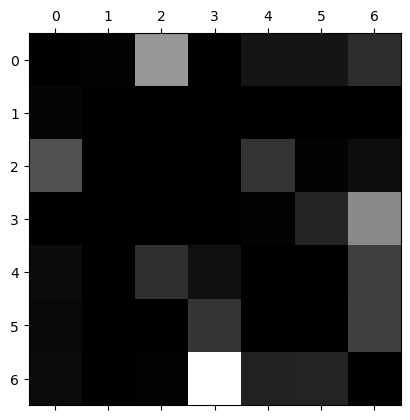

In [33]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [18]:
forest_clf.fit(features_arr, labels_arr)
cross_val_score(forest_clf, features_arr, labels_arr)

array([0.92883379, 0.91919192, 0.92011019, 0.92512632, 0.92512632])

In [24]:
test_set = strat_test_set.drop('Class', axis=1)
test_set_scaled = min_max.fit_transform(test_set)
prediction = forest_clf.predict(test_set_scaled)
prediction

array([3, 1, 6, ..., 4, 2, 3])

In [27]:
correct_labels = le.fit_transform(strat_test_set['Class'])
accuracy = np.mean(prediction == correct_labels) * 100
accuracy

90.70877708409843

In [36]:
GBM_clf = HistGradientBoostingClassifier().fit(features_arr, labels_arr)

In [37]:
cross_val_score(GBM_clf, features_arr, labels_arr)

array([0.94077135, 0.92056933, 0.92699725, 0.92237023, 0.93569132])

In [38]:
probas_GBM = cross_val_predict(GBM_clf, features_arr, labels_arr, cv=3)

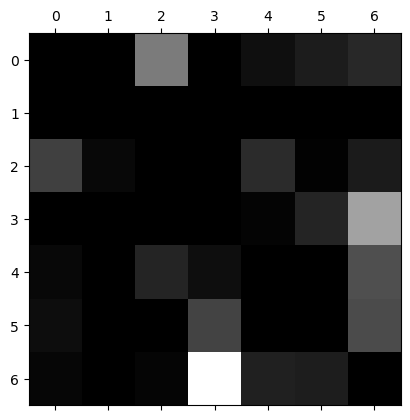

In [39]:
conf_mx_GBM = confusion_matrix(labels_arr, probas_GBM)
row_sums_GBM = conf_mx_GBM.sum(axis=1, keepdims=True)
norm_conf_mx_GBM = conf_mx_GBM / row_sums_GBM
np.fill_diagonal(norm_conf_mx_GBM, 0)
plt.matshow(norm_conf_mx_GBM, cmap=plt.cm.gray)
plt.show()